  Adjustments  Unadjusted  Seasonally adjusted
0    Jan-1991    12588862             15026890
1    Feb-1991    12154321             15304585
2    Mar-1991    14337072             15413591
3    Apr-1991    15108570             15293409
4    May-1991    17225734             15676083
             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083
             Unadjusted
Adjustments            
1991-01-31     12588862
1991-02-28     12154321
1991-03-31     14337072
1991-04-30     15108570
1991-05-31     17225734
               Scaled
Adjustments          
1991-01-31   0.014020
1991-02-28   0.000000
1991-03-31   0.070426
1991-04-30   0.095318
1991-05-31   0.163628
              shift_1   shift_2   shift_3   shift_4   shift_5   shift_6  \
Adjust

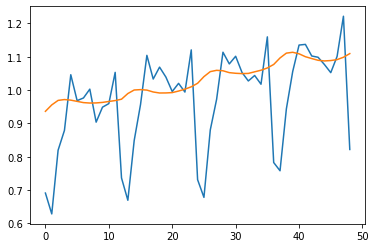

In [82]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('cansim-0800020-eng-6674700030567901031.csv',
                 skiprows=6, skipfooter=9,
                 engine='python')
print(df.head())

from pandas.tseries.offsets import MonthEnd 
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1) 
df = df.set_index('Adjustments') 
print(df.head()) 
# df.plot()

split_date = pd.Timestamp('01-01-2011')
# 2011/1/1 까지의 데이터를 트레이닝셋.
# 그 이후 데이터를 테스트셋으로 한다.

train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]
print(train.head())
# Feature는 Unadjusted 한 개

# ax = train.plot()
# test.plot(ax=ax)
# plt.legend(['train', 'test'])

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

# print(train_sc)

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
print(train_sc_df.head())

for s in range(1, 25):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

# print(train_sc_df.head(13))

X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]
print(X_train.head())

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

# print(X_train.head())

X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

# print(X_train.shape)
# print(X_train)
# print(y_train.shape)
# print(y_train)

X_train_t = X_train.reshape(X_train.shape[0], 24, 1)
X_test_t = X_test.reshape(X_test.shape[0], 24, 1)

print(X_test_t.shape)
# print("최종 DATA")
# print(X_train_t.shape)
# print(X_train_t)
# print(y_train)

from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(50, input_shape=(24, 1), return_sequences = True)) # (timestep, feature)
model.add(LSTM(50)) # (timestep, feature)
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
# print(model.summary())

early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

model.fit(X_train_t, y_train, epochs=20,
          batch_size=50, verbose=1, validation_split = 0.2, callbacks=[early_stop])

# print("actual", y_test)

# print(type(y_test))
plt.plot(y_test)

y_pred = model.predict(X_test_t)
# print("predict", y_pred)

plt.plot(y_pred)
plt.show()

[[110], [130], [120]]


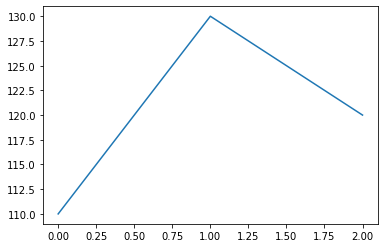

In [50]:
from matplotlib import pyplot as plt
 
print([[110],[130],[120]])
plt.plot([[110],[130],[120]])
plt.show()